<a href="https://colab.research.google.com/github/sahupra1357/tensorflow/blob/main/Tensorflow_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/sahupra1357/tensorflow/main/BTC-USD.csv

--2023-12-31 00:33:16--  https://raw.githubusercontent.com/sahupra1357/tensorflow/main/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280502 (274K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 273.93K  --.-KB/s    in 0.03s   

2023-12-31 00:33:16 (8.63 MB/s) - ‘BTC-USD.csv’ saved [280502/280502]



In [2]:
import pandas as pd

df = pd.read_csv("BTC-USD.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3388 entries, 2014-09-17 to 2023-12-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3387 non-null   float64
 1   High       3387 non-null   float64
 2   Low        3387 non-null   float64
 3   Close      3387 non-null   float64
 4   Adj Close  3387 non-null   float64
 5   Volume     3387 non-null   float64
dtypes: float64(6)
memory usage: 185.3 KB


In [4]:
bitcoin_price = df[['Close']].rename(columns={'Close':'Price'})
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [5]:
bitcoin_price = bitcoin_price.dropna()

In [6]:
bitcoin_price.shape

(3387, 1)

<Axes: xlabel='Date'>

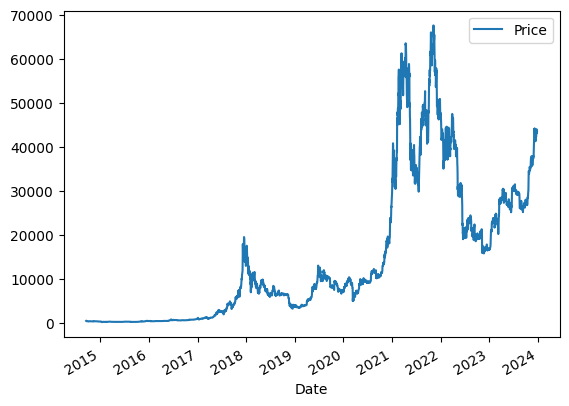

In [7]:
import matplotlib.pyplot as plt
bitcoin_price.plot()

In [8]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price.Price.to_numpy()

In [9]:
timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2709,), (678,), (2709,), (678,))

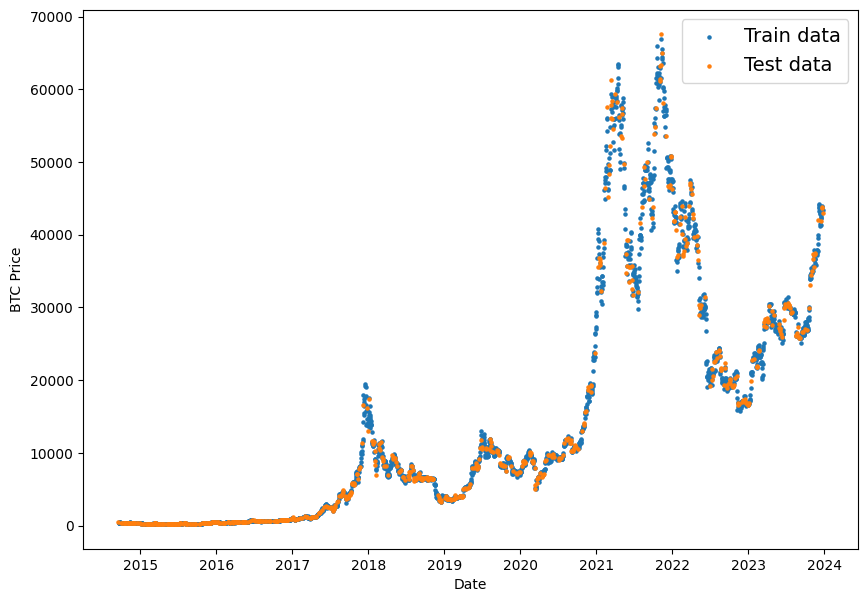

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [12]:
split_size = int(0.8*len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2709, 678, 2709, 678)

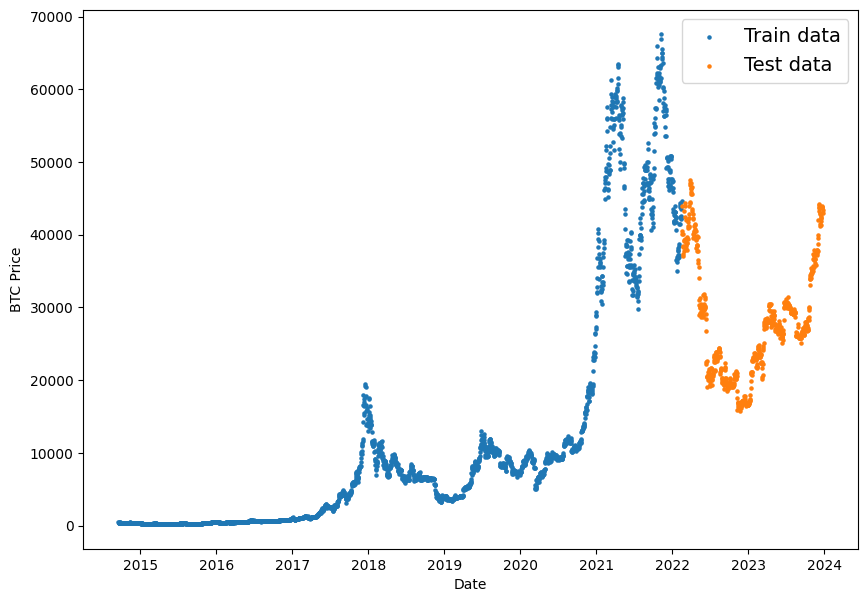

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
def plot_time_series(timesteps, values, format='.',start=0, end=None, label=None):
  plt.plot(timesteps[start:end],values[start:end], format, label=label)
  #plt.plot(timesteps[start:end],values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

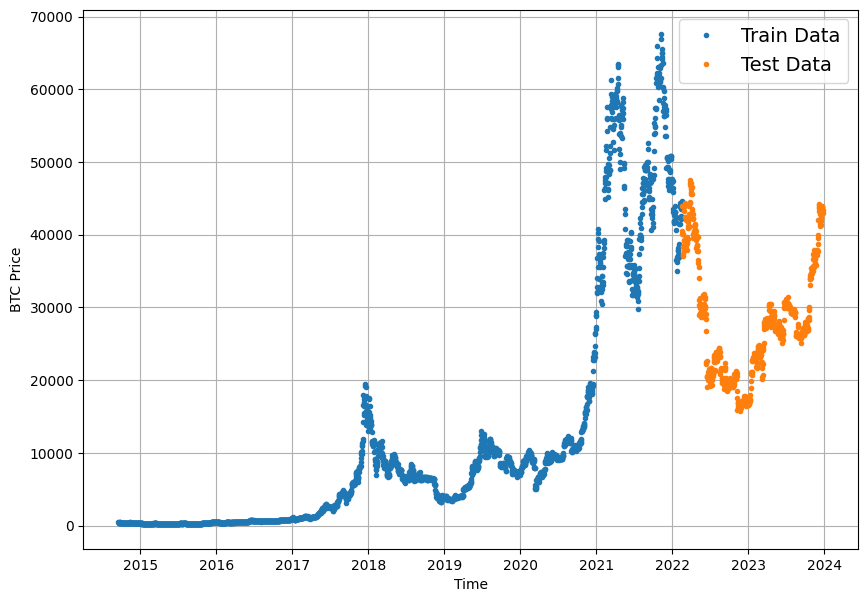

In [15]:
plt.figure(figsize=(10,7))

plot_time_series(X_train,y_train,label='Train Data')
plot_time_series(X_test,y_test,label='Test Data')

##Naive Forcast

In [16]:
naive_forecast = y_test[:-1]

In [17]:
y_test[-10:]

array([42240.117188, 41364.664063, 42623.539063, 42270.527344,
       43652.25    , 43869.152344, 43997.902344, 43739.542969,
       43016.117188, 43447.4375  ])

In [18]:
naive_forecast[-10:]

array([41929.757813, 42240.117188, 41364.664063, 42623.539063,
       42270.527344, 43652.25    , 43869.152344, 43997.902344,
       43739.542969, 43016.117188])

In [19]:
y_test.shape,  naive_forecast.shape

((678,), (677,))

In [20]:
y_test[:10], naive_forecast[:10]

(array([43961.859375, 40538.011719, 40030.976563, 40122.15625 ,
        38431.378906, 37075.28125 , 38286.027344, 37296.570313,
        38332.609375, 39214.21875 ]),
 array([43961.859375, 40538.011719, 40030.976563, 40122.15625 ,
        38431.378906, 37075.28125 , 38286.027344, 37296.570313,
        38332.609375, 39214.21875 ]))

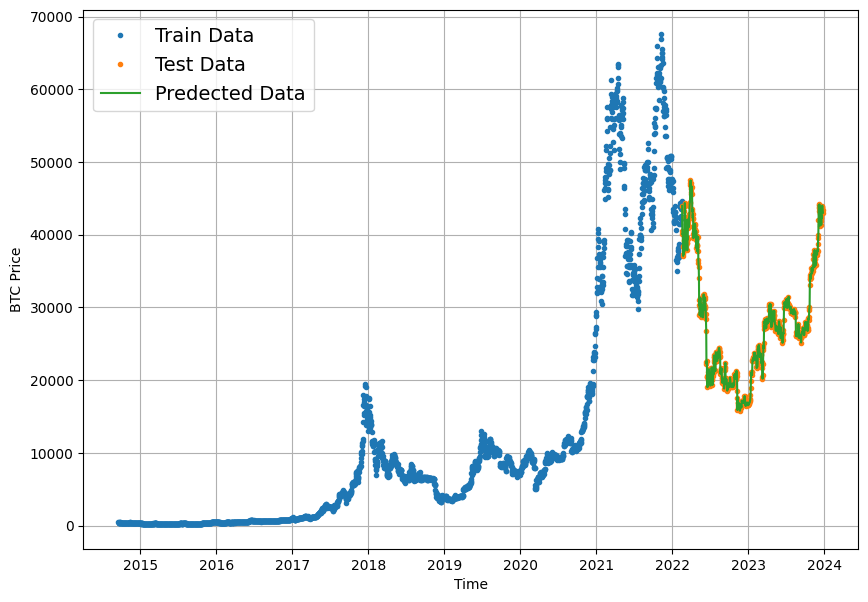

In [21]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train,y_train,label='Train Data')
plot_time_series(X_test,y_test,label='Test Data')
plot_time_series(X_test[1:],naive_forecast,format ='-', label='Predected Data')

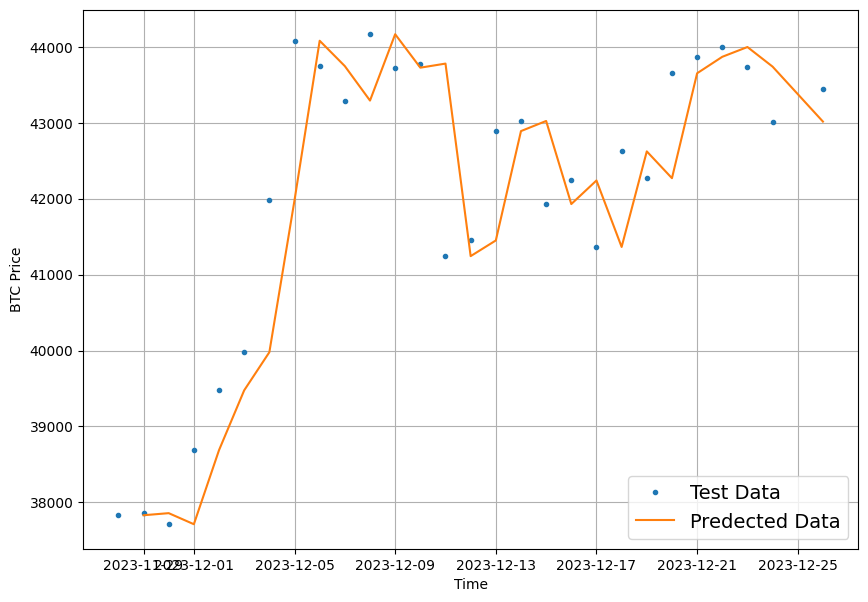

In [22]:
plt.figure(figsize=(10, 7))
offset=650
plot_time_series(X_test,y_test,start=offset,label='Test Data')
plot_time_series(X_test[1:],naive_forecast,start=offset,format ='-', label='Predected Data')

In [23]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true,y_pred))
  mae_naive_no_reason = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_reason

In [24]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape= tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy() ,
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy() ,
          "mase" : mase.numpy() }


In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 525.023,
 'mse': 674755.0,
 'rmse': 821.4347,
 'mape': 1.886807,
 'mase': 52.828465}

In [26]:
tf.reduce_mean(y_test).numpy()

27533.88412905604

##Moving average

In [27]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [28]:
#bitcoin_price.plot()
#plt.show()

In [29]:
rolling = bitcoin_price.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

,Price
Date,
2014-09-17,NaN
2014-09-18,NaN
2014-09-19,425.523336
2014-09-20,409.379995
2014-09-21,400.840332
2014-09-22,403.292338
2014-09-23,412.254669
2014-09-24,420.382660
2014-09-25,423.523326


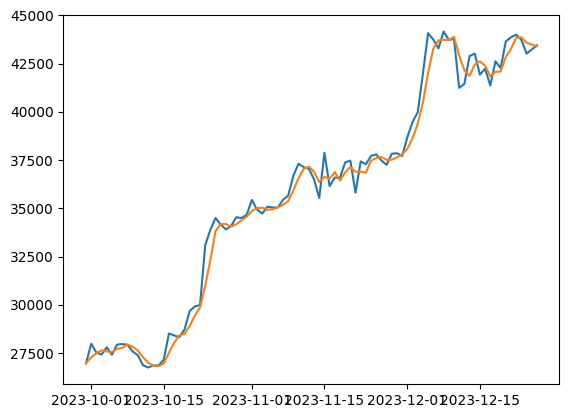

In [30]:
plt.plot(bitcoin_price.index[3300:],bitcoin_price['Price'][3300:])
plt.plot(rolling_mean.index[3300:],rolling_mean['Price'][3300:])
plt.show()

In [31]:
from pandas import DataFrame
from pandas import concat
bitcoin_price['rolling_mean'] = bitcoin_price['Price'].rolling(3).mean()
bitcoin_price['seasonl_diff'] = bitcoin_price['Price']-bitcoin_price['rolling_mean']
bitcoin_price

,Price,rolling_mean,seasonl_diff
Date,,,
2014-09-17,457.334015,NaN,NaN
2014-09-18,424.440002,NaN,NaN
2014-09-19,394.795990,425.523336,-30.727346
2014-09-20,408.903992,409.379995,-0.476003
2014-09-21,398.821014,400.840332,-2.019318
...,...,...,...
2023-12-21,43869.152344,43263.976563,605.175781
2023-12-22,43997.902344,43839.768229,158.134115
2023-12-23,43739.542969,43868.865886,-129.322917


In [32]:
bitcoin_price_ns = bitcoin_price[['seasonl_diff']][2:]
bitcoin_price_ns

,seasonl_diff
Date,
2014-09-19,-30.727346
2014-09-20,-0.476003
2014-09-21,-2.019318
2014-09-22,-1.140330
2014-09-23,23.536316
...,...
2023-12-21,605.175781
2023-12-22,158.134115
2023-12-23,-129.322917


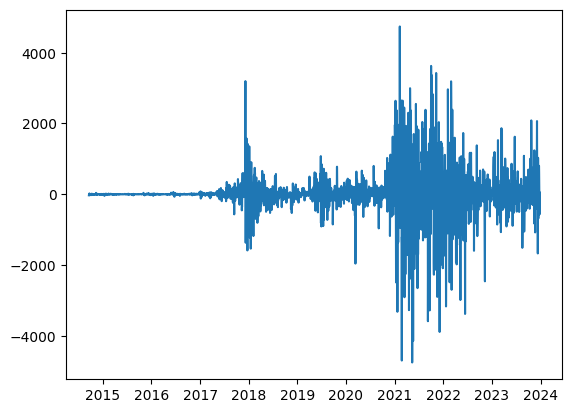

In [33]:
plt.plot(bitcoin_price_ns.index,bitcoin_price_ns['seasonl_diff'])

In [34]:
df_rolling = DataFrame(bitcoin_price_ns.values)
width = 3
lag1 = df_rolling.shift(1)
lag3 = df_rolling.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df_rolling], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10),dataframe.shape)

        mean        t-1        t+1
0        NaN        NaN -30.727346
1        NaN -30.727346  -0.476003
2        NaN  -0.476003  -2.019318
3        NaN  -2.019318  -1.140330
4 -11.074222  -1.140330  23.536316
5  -1.211884  23.536316   2.822327
6   6.792223   2.822327 -11.949321
7   8.406104 -11.949321  -8.643005
8   4.803107  -8.643005  -5.653005
9  -5.923333  -5.653005 -16.527659 (3385, 3)


In [35]:
len(bitcoin_price_ns.values[-500:])

500

predicted=196.562322, expected=394.897135
predicted=205.074663, expected=-218.279948
predicted=192.773615, expected=-279.281250
predicted=216.392016, expected=333.555990
predicted=248.696792, expected=-403.086588
predicted=228.026219, expected=-199.319011
predicted=217.895774, expected=762.954427
predicted=259.026012, expected=150.184245
predicted=284.236920, expected=191.654948
predicted=341.612246, expected=103.341146
predicted=372.167347, expected=-163.634114
predicted=353.902847, expected=-343.300781
predicted=285.143052, expected=115.550130
predicted=205.566436, expected=132.552734
predicted=164.157227, expected=-85.930990
predicted=163.155599, expected=-123.468750
predicted=142.641217, expected=-24.803385
predicted=59.406072, expected=264.149088
predicted=49.366803, expected=1008.371745
predicted=69.633049, expected=828.028646
predicted=99.241655, expected=130.022135
predicted=96.883256, expected=141.340495
predicted=123.431729, expected=144.426433
predicted=112.046697, expected=

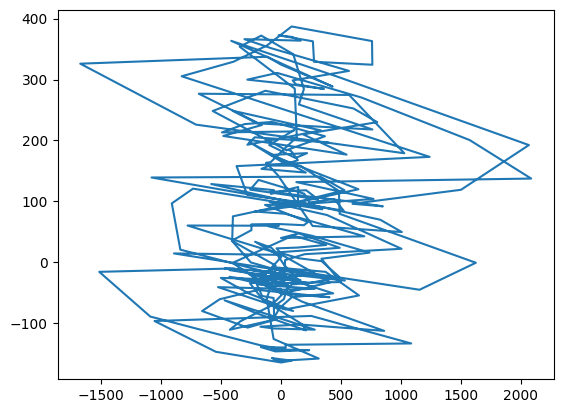

In [36]:
from numpy import mean
from sklearn.metrics import mean_squared_error
X = bitcoin_price_ns.values[-300:]
window = 22
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
 length = len(history)
 yhat = mean([history[i] for i in range(length-window,length)])
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test,predictions)

In [37]:
bitcoin_price = bitcoin_price[['Price']]

In [38]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

--2023-12-31 00:33:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6220 (6.1K) [text/plain]
Saving to: ‘daily-total-female-births.csv’

daily-total-female- 100%[===================>]   6.07K  --.-KB/s    in 0s      

2023-12-31 00:33:28 (77.5 MB/s) - ‘daily-total-female-births.csv’ saved [6220/6220]



In [39]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# prepare situation
X = series.values[:10]
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
history,test

([array([35]), array([32]), array([30])],
 [array([31]),
  array([44]),
  array([29]),
  array([45]),
  array([43]),
  array([38]),
  array([27])])

In [40]:
history
print(history)
length = len(history)
yhat = mean([history[i] for i in range(length-window,length)])
print(yhat)

[array([35]), array([32]), array([30])]
32.333333333333336


3 0
[array([35]), array([32]), array([30])]
32.333333333333336

4 1
[array([32]), array([30]), array([31])]
31.0

5 2
[array([30]), array([31]), array([44])]
35.0

6 3
[array([31]), array([44]), array([29])]
34.666666666666664

7 4
[array([44]), array([29]), array([45])]
39.333333333333336

8 5
[array([29]), array([45]), array([43])]
39.0

9 6
[array([45]), array([43]), array([38])]
42.0



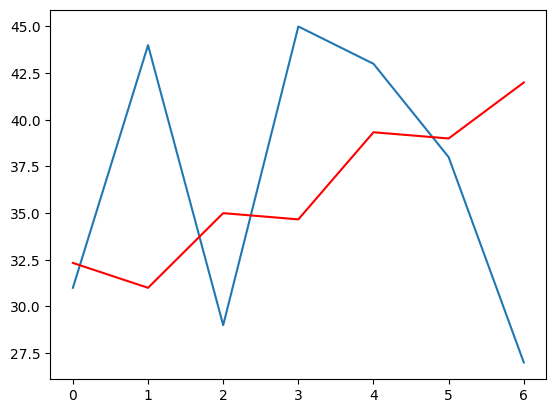

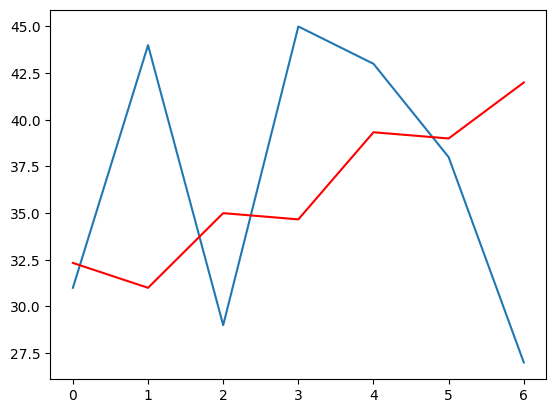

In [41]:
# walk forward over time steps in test
for t in range(len(test)):
 length = len(history)
 print(length,length-window)
 print([history[i] for i in range(length-window,length)])
 yhat = mean([history[i] for i in range(length-window,length)])
 print(yhat)
 print()
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 #print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

##Windowing dataset

In [42]:
tf.range(8)+1

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [43]:
ss = tf.expand_dims(tf.range(8)+1, axis=0)
ss

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [44]:
ss[:, :-1],ss[:, -1:]

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [45]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [46]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [47]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [48]:
import numpy as np
def make_windows(x, window_size=7, horizon=1):
  window_steps = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_steps + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]
  window, labels = get_labelled_windows(windowed_array,horizon=horizon)

  return window, labels

In [49]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [50]:
np.expand_dims(np.arange(8), axis=0) + np.expand_dims(np.arange(15-7), axis=0).T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [51]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3380, 3380)

In [52]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [53]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [42240.117188 41364.664063 42623.539063 42270.527344 43652.25
 43869.152344 43997.902344] -> Label: [43739.542969]
Window: [41364.664063 42623.539063 42270.527344 43652.25     43869.152344
 43997.902344 43739.542969] -> Label: [43016.117188]
Window: [42623.539063 42270.527344 43652.25     43869.152344 43997.902344
 43739.542969 43016.117188] -> Label: [43447.4375]


In [54]:
def make_train_test_splits(windows, labels, test_size=0.2):
  #split_size= int(len(window)*(1-test_size))
  split_size= int(len(windows)*test_size)
  train_windows = windows[:-split_size]
  train_labels = labels[:-split_size]
  test_windows = windows[-split_size:]
  test_labels = labels[-split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2704, 676, 2704, 676)

In [56]:
train_windows[:2], train_labels[:2]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987]]),
 array([[423.204987],
        [411.574005]]))

In [57]:
len(y_train[WINDOW_SIZE:])

2702

In [58]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [59]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), verbose=0,save_best_only=True)

In [60]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
22/22 [==============================] - 2s 36ms/step - loss: 2084.0354 - mae: 2084.0354 - val_loss: 1370.4232 - val_mae: 1370.4232
Epoch 2/100
22/22 [==============================] - 0s 21ms/step - loss: 650.3968 - mae: 650.3968 - val_loss: 882.9366 - val_mae: 882.9366
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 553.6849 - mae: 553.6849 - val_loss: 1071.0358 - val_mae: 1071.0358
Epoch 4/100
22/22 [==============================] - 0s 21ms/step - loss: 533.6299 - mae: 533.6299 - val_loss: 826.8867 - val_mae: 826.8867
Epoch 5/100
22/22 [==============================] - 1s 25ms/step - loss: 513.1581 - mae: 513.1581 - val_loss: 803.3256 - val_mae: 803.3256
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 501.5131 - mae: 501.5131 - val_loss: 840.5828 - val_mae: 840.5828
Epoch 7/100
22/22 [==============================] - 1s 42ms/step - loss: 487.0204 - mae: 487.0204 - val_loss: 794.4479 - val_mae: 794.4479
Epoch 8/100
22/2

In [61]:
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 582.7755 - mae: 582.7755


[582.7755126953125, 582.7755126953125]

In [62]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 523.8643 - mae: 523.8643


[523.8642578125, 523.8642578125]

In [63]:
def make_preds(model,inpout_data):
  forecast =model.predict(test_windows)
  return tf.squeeze(forecast)

In [64]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds)

22/22 [==============================] - 0s 1ms/step


676

In [65]:
model_1_preds

<tf.Tensor: shape=(676,), dtype=float32, numpy=
array([40950.62 , 40156.67 , 40035.145, 38615.04 , 37168.082, 37893.465,
       37250.934, 38185.27 , 38991.863, 38997.504, 37966.562, 42560.22 ,
       44170.21 , 44066.36 , 42777.71 , 39482.816, 39708.543, 38460.727,
       37941.285, 38527.598, 41353.6  , 39672.508, 38909.164, 38905.816,
       37916.316, 39624.59 , 39150.58 , 40891.777, 40987.098, 41662.98 ,
       42283.46 , 41329.668, 41234.57 , 42177.375, 42813.88 , 43854.98 ,
       44265.707, 44492.855, 46667.773, 47100.137, 47526.348, 47183.42 ,
       45731.598, 46343.305, 45849.992, 46353.38 , 46550.613, 45553.12 ,
       43522.355, 43435.523, 42344.824, 42660.215, 42143.543, 39637.27 ,
       40087.082, 40865.85 , 39992.75 , 40463.93 , 40248.465, 39796.066,
       40761.418, 41298.082, 41396.785, 40635.266, 39796.434, 39553.65 ,
       39447.29 , 40278.137, 38273.504, 39093.65 , 39644.727, 38668.21 ,
       37899.4  , 38221.266, 38507.32 , 37827.547, 39419.066, 36805.832,
   

In [66]:
dense_results = evaluate_preds(y_true=np.squeeze(test_labels),y_pred=model_1_preds)
dense_results

{'mae': 523.8644,
 'mse': 664828.7,
 'rmse': 815.37024,
 'mape': 1.8918785,
 'mase': 52.7894}

In [67]:
len(X_test)

678

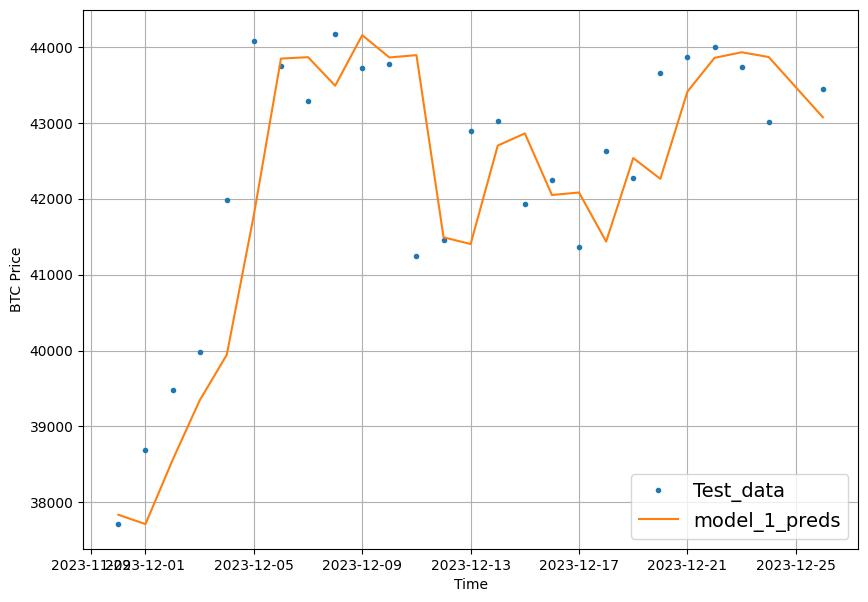

In [68]:
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


In [69]:
HORIZON = 1
WINDOW_SIZE = 30

In [70]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3357, 3357)

In [71]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2686, 671, 2686, 671)

In [72]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
21/21 [==============================] - 1s 30ms/step - loss: 3543.9346 - mae: 3543.9346 - val_loss: 2228.9626 - val_mae: 2228.9626
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 1345.1422 - mae: 1345.1422 - val_loss: 1640.7744 - val_mae: 1640.7744
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 995.0869 - mae: 995.0869 - val_loss: 1743.5918 - val_mae: 1743.5918
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 906.8865 - mae: 906.8865 - val_loss: 1275.4852 - val_mae: 1275.4852
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 843.6700 - mae: 843.6700 - val_loss: 1286.1233 - val_mae: 1286.1233
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 810.0795 - mae: 810.0795 - val_loss: 1288.4741 - val_mae: 1288.4741
Epoch 7/100
21/21 [==============================] - 1s 37ms/step - loss: 787.6118 - mae: 787.6118 - val_loss: 1146.9751 - val_mae: 1146.9751
Epoch

In [73]:
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 10ms/step - loss: 870.0580 - mae: 870.0580


[870.0580444335938, 870.0580444335938]

In [74]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 580.3141 - mae: 580.3141


[580.3140869140625, 580.3140869140625]

In [75]:
model_2_preds = make_preds(model_2,test_windows)
len(model_2_preds)

21/21 [==============================] - 1s 2ms/step


671

In [76]:
dense_2_results = evaluate_preds(y_true=np.squeeze(test_labels),y_pred=model_2_preds)
dense_2_results

{'mae': 580.3141,
 'mse': 755492.25,
 'rmse': 869.19055,
 'mape': 2.1101665,
 'mase': 53.043438}

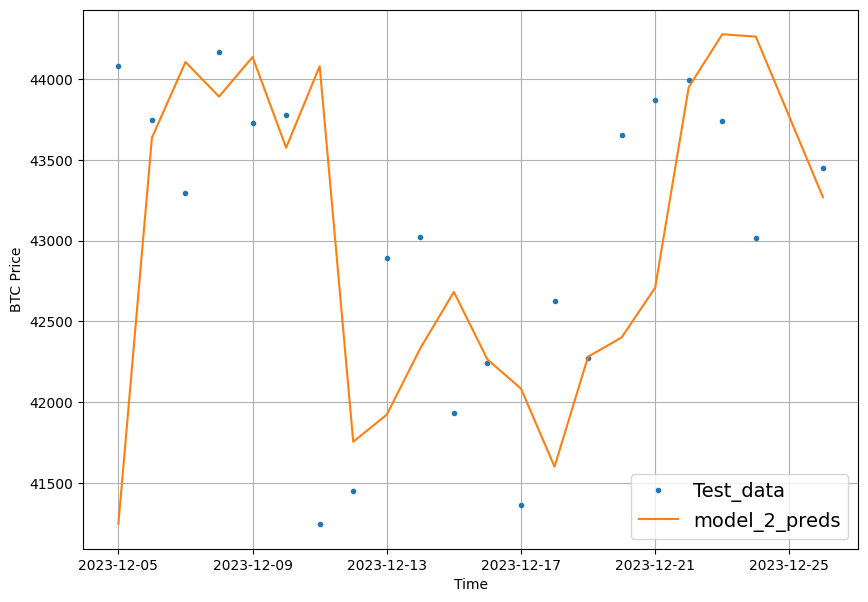

In [77]:
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [78]:
HORIZON = 7
WINDOW_SIZE = 30

In [79]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3351, 3351)

In [80]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2681, 670, 2681, 670)

In [81]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
21/21 [==============================] - 1s 29ms/step - loss: 7461.1763 - mae: 7461.1763 - val_loss: 4529.4873 - val_mae: 4529.4873
Epoch 2/100
21/21 [==============================] - 0s 22ms/step - loss: 1841.5496 - mae: 1841.5496 - val_loss: 2856.7913 - val_mae: 2856.7913
Epoch 3/100
21/21 [==============================] - 0s 21ms/step - loss: 1459.2084 - mae: 1459.2084 - val_loss: 2399.4006 - val_mae: 2399.4006
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 1310.8014 - mae: 1310.8014 - val_loss: 2039.5389 - val_mae: 2039.5389
Epoch 5/100
21/21 [==============================] - 0s 24ms/step - loss: 1202.8773 - mae: 1202.8773 - val_loss: 1873.1909 - val_mae: 1873.1909
Epoch 6/100
21/21 [==============================] - 0s 24ms/step - loss: 1132.0934 - mae: 1132.0934 - val_loss: 1739.4570 - val_mae: 1739.4570
Epoch 7/100
21/21 [==============================] - 0s 22ms/step - loss: 1070.9041 - mae: 1070.9041 - val_loss: 1685.5314 - val_mae: 16

In [82]:
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1219.9379 - mae: 1219.9379


[1219.9378662109375, 1219.9378662109375]

In [83]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 2ms/step - loss: 1111.8835 - mae: 1111.8835


[1111.883544921875, 1111.883544921875]

In [84]:
model_3_preds = make_preds(model_3,test_windows)
len(model_3_preds)

21/21 [==============================] - 0s 1ms/step


670

In [85]:
dense_3_results = evaluate_preds(y_true=np.squeeze(test_labels),y_pred=model_3_preds)
dense_3_results

{'mae': 1111.8835,
 'mse': 2913884.0,
 'rmse': 1285.0123,
 'mape': 4.092249,
 'mase': 52.739143}

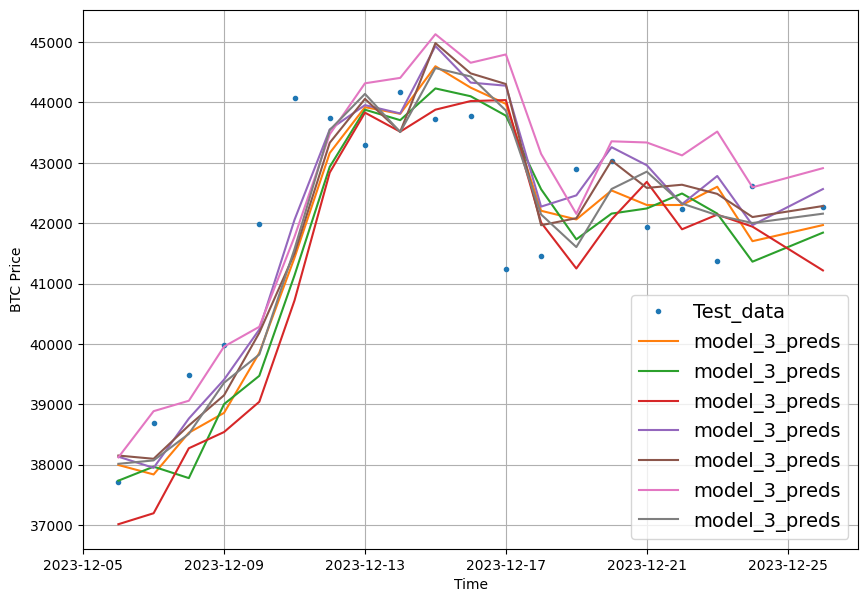

In [86]:
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-", label="model_3_preds")

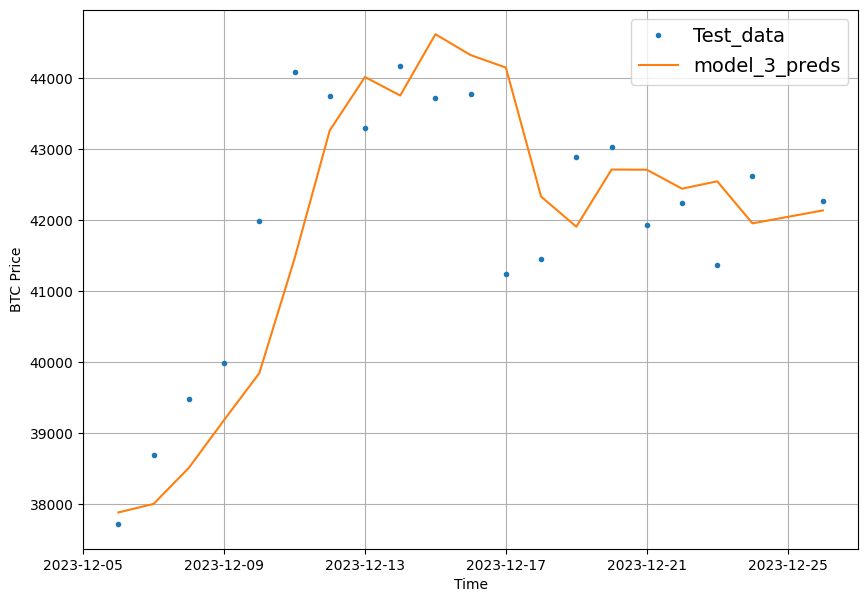

In [87]:
offset = 650
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="model_3_preds")

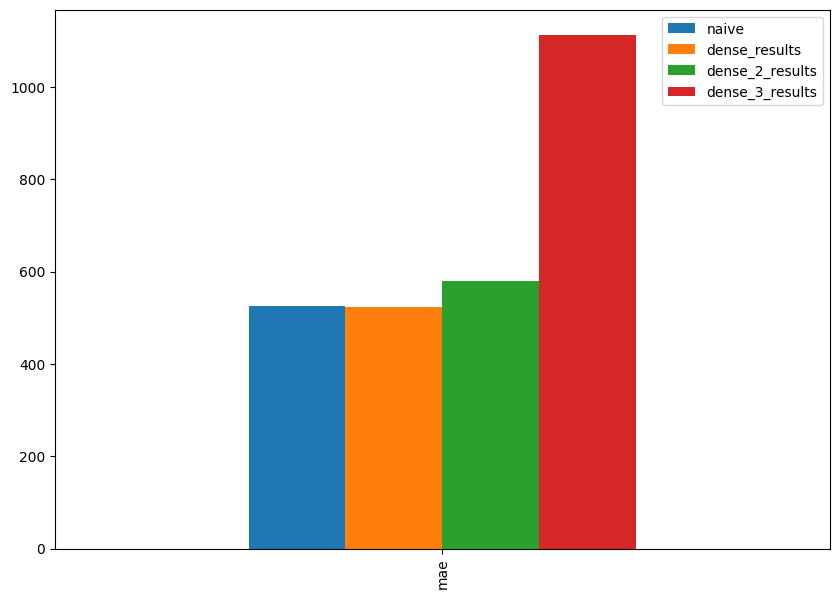

In [88]:
pd.DataFrame({"naive": naive_results["mae"],
              "dense_results": dense_results["mae"],
              "dense_2_results": dense_2_results["mae"],
              "dense_3_results": dense_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [89]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3380, 3380)

In [90]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2704, 676, 2704, 676)

In [91]:
train_windows[0].shape

(7,)

In [92]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [93]:
tf.expand_dims(train_windows[0], axis=1)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[457.334015],
       [424.440002],
       [394.79599 ],
       [408.903992],
       [398.821014],
       [402.152008],
       [435.790985]])>

In [94]:
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [95]:
x[..., tf.newaxis]

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[457.334015],
       [424.440002],
       [394.79599 ],
       [408.903992],
       [398.821014],
       [402.152008],
       [435.790985]])>

In [96]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [97]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 538.0756


538.0755615234375

In [99]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41275.46 , 40104.457, 39941.664, 38497.703, 37060.363, 37736.387,
       37286.703, 37865.92 , 38885.562, 39044.51 ], dtype=float32)>

In [100]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 538.07556,
 'mse': 688285.4,
 'rmse': 829.62964,
 'mape': 1.9397871,
 'mase': 52.7894}

In [101]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [102]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 4ms/step - loss: 553.7160


553.7160034179688

In [103]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

22/22 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41758.598, 40616.58 , 40102.73 , 38572.844, 37274.87 , 37881.21 ,
       37321.46 , 37899.844, 38865.047, 39154.78 ], dtype=float32)>

In [104]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 553.71606,
 'mse': 720571.5,
 'rmse': 848.86487,
 'mape': 1.9982133,
 'mase': 52.7894}

In [105]:
bitcoin_price.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [106]:
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [107]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_price.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2063)

In [108]:
bitcoin_prices_block = bitcoin_price.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


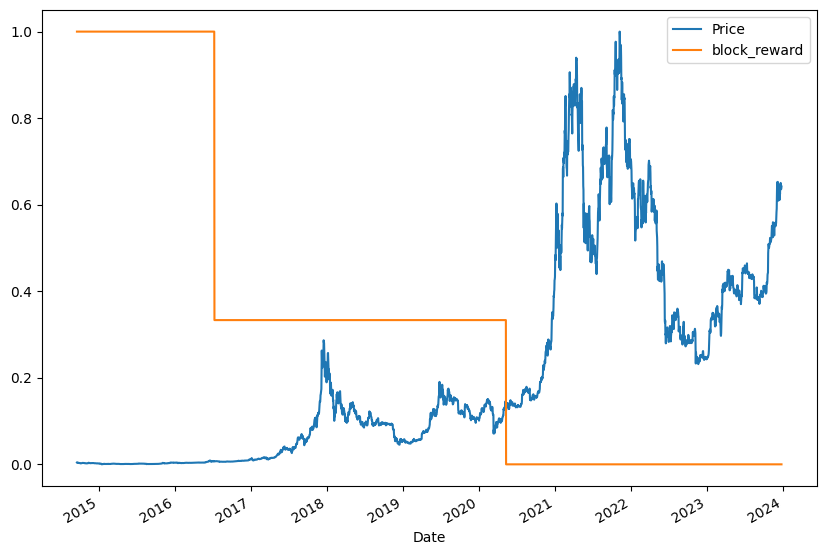

In [109]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [110]:
HORIZON = 1
WINDOW_SIZE = 7

In [111]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [112]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [113]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [114]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2704, 2704, 676, 676)

In [115]:
X_train

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.00,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.00,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.00,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.00,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.00,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
...,...,...,...,...,...,...,...,...
2022-02-13,6.25,42244.468750,42407.937500,43565.113281,44338.796875,44118.445312,43840.285156,42412.433594
2022-02-14,6.25,42197.515625,42244.468750,42407.937500,43565.113281,44338.796875,44118.445312,43840.285156
2022-02-15,6.25,42586.917969,42197.515625,42244.468750,42407.937500,43565.113281,44338.796875,44118.445312


In [116]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [117]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 528.8685


528.8684692382812

In [118]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41194.78 , 40005.36 , 39965.6  , 38543.96 , 37074.79 , 37880.406,
       37380.08 , 38015.605, 39030.78 , 39177.18 ], dtype=float32)>

In [119]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 528.86847,
 'mse': 671974.3,
 'rmse': 819.74036,
 'mape': 1.9082762,
 'mase': 52.7894}

In [120]:
dense_results

{'mae': 523.8644,
 'mse': 664828.7,
 'rmse': 815.37024,
 'mape': 1.8918785,
 'mase': 52.7894}

Epoch 1/250
22/22 [==============================] - 3s 67ms/step - loss: 2841.3259 - val_loss: 1398.3611
Epoch 2/250
22/22 [==============================] - 1s 57ms/step - loss: 723.6998 - val_loss: 927.4678
Epoch 3/250
22/22 [==============================] - 1s 40ms/step - loss: 591.0762 - val_loss: 871.9307
Epoch 4/250
22/22 [==============================] - 0s 5ms/step - loss: 549.6224 - val_loss: 978.6916
Epoch 5/250
22/22 [==============================] - 0s 5ms/step - loss: 547.7204 - val_loss: 944.2674
Epoch 6/250
22/22 [==============================] - 1s 39ms/step - loss: 491.4634 - val_loss: 725.9168
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 521.2811 - val_loss: 1107.0309
Epoch 8/250
22/22 [==============================] - 0s 5ms/step - loss: 435.8787 - val_loss: 739.8477
Epoch 9/250
22/22 [==============================] - 0s 5ms/step - loss: 441.4766 - val_loss: 1196.8234
Epoch 10/250
22/22 [==============================] - 1s 40ms/ste

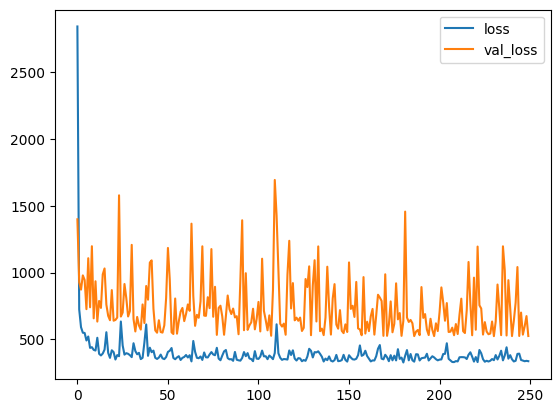

In [121]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_7_dense_multivariate")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history = model_7.fit(X_train, y_train,
            epochs=250,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_7.name)])

for metrics in [("loss", "val_loss")]:
    pd.DataFrame(history.history, columns=metrics).plot()
    plt.show()

In [122]:
model_7 = tf.keras.models.load_model("model_experiments/model_7_dense_multivariate")
model_7.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 523.9114


523.9114379882812

In [123]:
model_7_preds = tf.squeeze(model_7.predict(X_test))
model_7_preds[:10]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([40838.645, 40073.047, 40089.617, 38552.234, 37103.605, 37994.27 ,
       37310.19 , 38203.613, 39115.152, 39102.082], dtype=float32)>

In [124]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 523.9115,
 'mse': 662726.94,
 'rmse': 814.08044,
 'mape': 1.894885,
 'mase': 52.7894}

In [125]:
dense_results

{'mae': 523.8644,
 'mse': 664828.7,
 'rmse': 815.37024,
 'mape': 1.8918785,
 'mase': 52.7894}

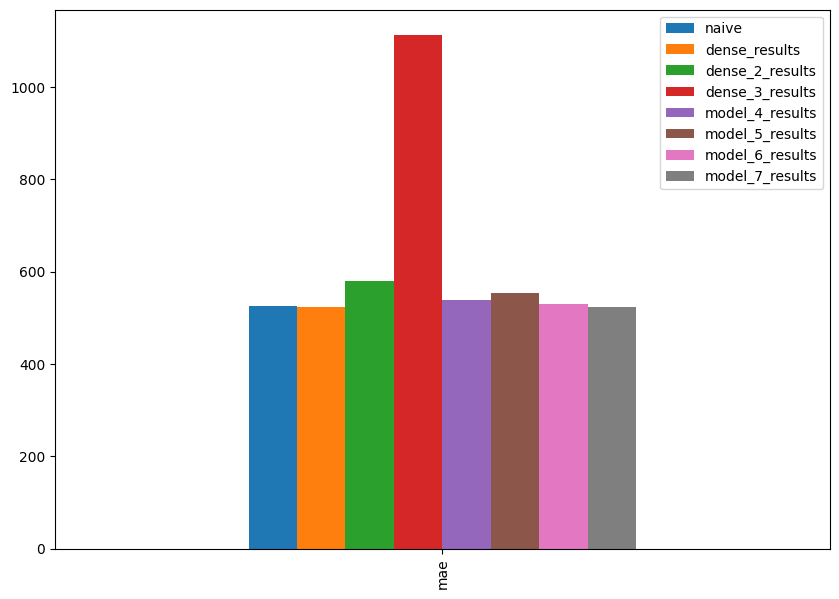

In [126]:
pd.DataFrame({"naive": naive_results["mae"],
              "dense_results": dense_results["mae"],
              "dense_2_results": dense_2_results["mae"],
              "dense_3_results": dense_3_results["mae"],
              "model_4_results": model_4_results["mae"],
              "model_5_results": model_5_results["mae"],
              "model_6_results": model_6_results["mae"],
              "model_7_results": model_7_results["mae"],
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar");

##N-BEATS

In [127]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [128]:
class Nbeats(tf.keras.layers.Layer):
  def __init__(self, input_size: int,theta_size: int, horizon: int,n_neuron: int, n_layer: int, **kwargs):
    super().__init__()
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon  = horizon
    self.n_neuron = n_neuron
    self.n_layer = n_layer

    self.hidden = [tf.keras.layers.Dense(n_neuron,activation='relu') for _ in range(self.n_layer)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation='linear', name='theta')

  def call(self, inputs):
    x = inputs

    for layer in self.hidden:
      x = layer(x)

    x = self.theta_layer(x)

    backcast, forcast = x[:, :self.input_size], x[:, -self.horizon:]

    return backcast, forcast

In [129]:
dummy_nbeat = Nbeats(input_size = WINDOW_SIZE,
                     theta_size = WINDOW_SIZE+HORIZON,
                     horizon = HORIZON,
                     n_neuron=128,
                     n_layer=4)



In [130]:
dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [131]:
backcast, forecast = dummy_nbeat(dummy_input)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.09382251 -0.1940009   0.21996519  0.17093718  0.22703072  0.24162602
 -0.39363468]
Forecast: 0.03714950382709503


In [132]:
var1, var2 = tf.range(10), tf.range(10)+10

addition_layer = layers.add([var1,var2])
subtracttion_layer = layers.subtract([var1,var2])

In [133]:
addition_layer,subtracttion_layer

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10], dtype=int32)>)

In [134]:
bitcoin_price_nbeats = bitcoin_price.copy()
for i in range(WINDOW_SIZE):
  bitcoin_price_nbeats[f'Price{i}'] = bitcoin_price_nbeats['Price'].shift(i+1)
bitcoin_price_nbeats

,Price,Price0,Price1,Price2,Price3,Price4,Price5,Price6
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-21,43869.152344,43652.250000,42270.527344,42623.539063,41364.664063,42240.117188,41929.757813,43023.972656
2023-12-22,43997.902344,43869.152344,43652.250000,42270.527344,42623.539063,41364.664063,42240.117188,41929.757813
2023-12-23,43739.542969,43997.902344,43869.152344,43652.250000,42270.527344,42623.539063,41364.664063,42240.117188


In [135]:
X_nbeats = bitcoin_price_nbeats.dropna().drop('Price', axis=1)
y_nbeats = bitcoin_price_nbeats.dropna()['Price']

In [136]:
train_split = int(len(X_nbeats)*0.8)

train_X = X_nbeats[:train_split]
test_X = X_nbeats[train_split:]

train_y = y_nbeats[:train_split]
test_y = y_nbeats[train_split:]

len(train_X),len(test_X),len(train_y),len(test_y)

(2704, 676, 2704, 676)

In [137]:
train_feature_dataset = tf.data.Dataset.from_tensor_slices(train_X)
train_label_dataset = tf.data.Dataset.from_tensor_slices(train_y)

test_feature_dataset = tf.data.Dataset.from_tensor_slices(test_X)
test_label_dataset = tf.data.Dataset.from_tensor_slices(test_y)

train_data = tf.data.Dataset.zip((train_feature_dataset,train_label_dataset))
test_data = tf.data.Dataset.zip((test_feature_dataset,test_label_dataset))

BATCH_SIZE = 1024

train_dataset =train_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset =test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [138]:
train_dataset,train_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [139]:
N_EPOCH = 5000
N_NEURON = 512
N_LAYERS = 4
N_STACK = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = WINDOW_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

In [140]:
%%time

nbeat_block = Nbeats(input_size = WINDOW_SIZE,
                     theta_size = WINDOW_SIZE+HORIZON,
                     horizon = HORIZON,
                     n_neuron=N_NEURON,
                     n_layer=N_LAYERS,
                     name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeat_block(stack_input)
resedue_block = layers.subtract([stack_input,backcast], name=f"subtract_00")
for i in range(N_STACK-1):
  backcast, forecast_block = Nbeats(input_size = WINDOW_SIZE,
                     theta_size = WINDOW_SIZE+HORIZON,
                     horizon = HORIZON,
                     n_neuron=N_NEURON,
                     n_layer=N_LAYERS,
                     name=f"NBeatsBlock_{i}")(resedue_block)
  resedue_block = layers.subtract([resedue_block,backcast],name=f"subtract_{i}")
  #print("i -->", i," ", resedue_block.name)
  forecast = layers.add([forecast,forecast_block], name=f"add_{i}")
  #print("i -->", i," ", forecast.name)

model_8 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_8_N-BEATS")

model_8.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(0.001),metrics=["mae", "mse"])

model_8.fit(train_dataset,
            epochs=N_EPOCH,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 292: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 498: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 598: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 2min 47s, sys: 5.19 s, total: 2min 53s
Wall time: 3min 14s


In [141]:
model_8.evaluate(test_dataset)

1/1 [==============================] - 0s 42ms/step - loss: 524.6946 - mae: 524.6946 - mse: 677795.3125


[524.6946411132812, 524.6946411132812, 677795.3125]

In [142]:
model_8_preds = make_preds(model_8, test_dataset)
model_8_preds[:10]

22/22 [==============================] - 2s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42408.785, 42046.3  , 42175.863, 43004.66 , 44790.035, 43979.33 ,
       40539.52 , 40095.76 , 40096.434, 38308.484], dtype=float32)>

In [143]:
model_8_results = evaluate_preds(y_true=test_y,
                                 y_pred=model_8_preds)
model_8_results

{'mae': 1461.6451,
 'mse': 4866275.0,
 'rmse': 2205.9634,
 'mape': 5.3452964,
 'mase': 52.7894}

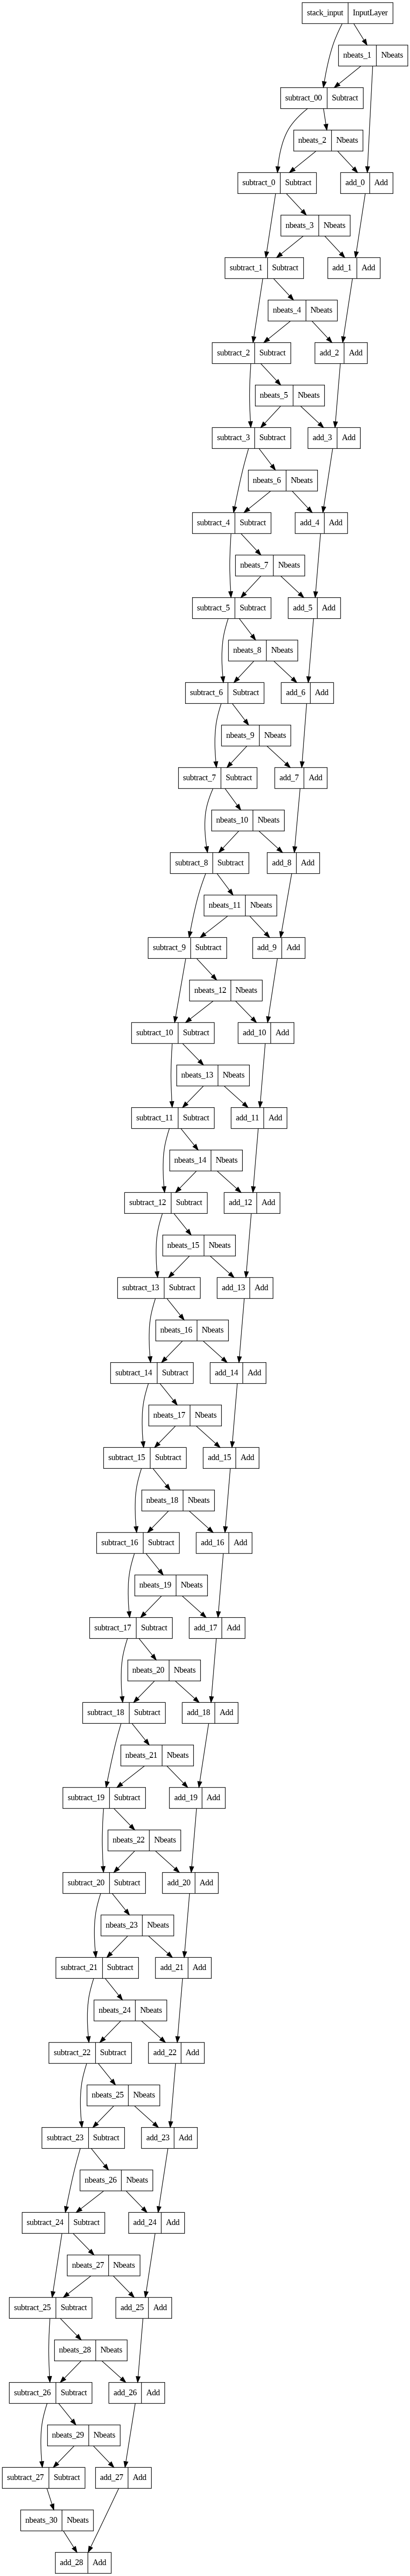

In [144]:
from tensorflow.keras.utils import plot_model
plot_model(model_8)

In [145]:
model_8.save(model_8.name)

## Ensemble

In [182]:
def get_ensemble(horizon = HORIZON, num_iter=10, numberofEpochs=100, loss_fns=['mae', 'mse','mape']):
  ensemble_modellist = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON, activation="linear")
      ])

      model.compile(loss=loss_function,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae", "mse"])

      model.fit(train_dataset,
                epochs=numberofEpochs,
                verbose=0,
                batch_size=128,
                validation_data=test_dataset,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                        tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
      ensemble_modellist.append(model)

  return ensemble_modellist

In [183]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble(num_iter=5,numberofEpochs=1000)


Epoch 839: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 454: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 554: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 226: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 913: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 554: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 401: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 501: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 122: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 230: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 330: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 712: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 805: ReduceLROnPlateau reducing l

In [184]:
def make_ensamble_pred(models, data):
  ensemble_preds = []
  for model in models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [185]:
ensemble_models

In [186]:
ensemble_preds = make_ensamble_pred(ensemble_models,test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


<tf.Tensor: shape=(15, 676), dtype=float32, numpy=
array([[41120.242, 39671.094, 40173.77 , ..., 44264.582, 43566.65 ,
        43093.223],
       [40415.14 , 39671.586, 39720.316, ..., 43752.613, 43865.605,
        42841.973],
       [40772.348, 40000.13 , 40268.465, ..., 43992.24 , 43803.035,
        43042.754],
       ...,
       [40619.652, 40108.08 , 40217.918, ..., 44097.633, 43716.7  ,
        43028.543],
       [41046.637, 40976.01 , 39704.13 , ..., 44378.293, 43797.137,
        42965.613],
       [40766.684, 40302.99 , 39912.78 , ..., 43781.06 , 44007.215,
        42945.082]], dtype=float32)>

In [187]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 521.40173,
 'mse': 658771.6,
 'rmse': 811.64746,
 'mape': 1.8793682,
 'mase': 52.7894}

In [188]:
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

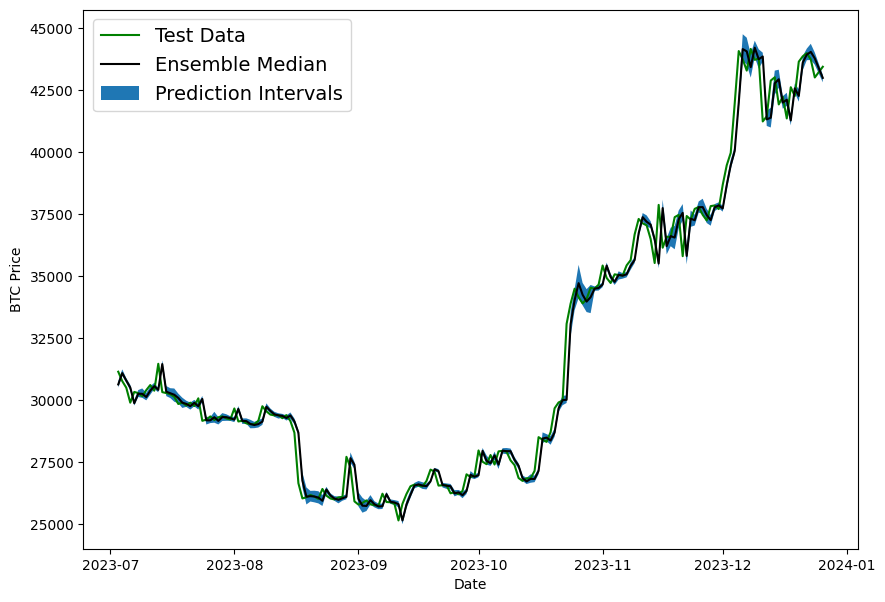

In [190]:
ensemble_median = np.median(ensemble_preds, axis=0)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(test_X.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(test_X.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

#All Data

In [191]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [192]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [193]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [194]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [195]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [196]:
INTO_FUTURE = 14

In [197]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 53ms/step
Predicting on: 
 [42270.527344 43652.25     43869.152344 43997.902344 43739.542969
 43016.117188 43447.4375  ] -> Prediction: 42634.3515625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [43652.25      43869.152344  43997.902344  43739.542969  43016.117188
 43447.4375    42634.3515625] -> Prediction: 43756.140625

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [43869.152344  43997.902344  43739.542969  43016.117188  43447.4375
 42634.3515625 43756.140625 ] -> Prediction: 43602.76171875

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [43997.902344   43739.542969   43016.117188   43447.4375
 42634.3515625  43756.140625   43602.76171875] -> Prediction: 43599.21484375

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [43739.542969   43016.117188   43447.4375     42634.3515625
 43756.140625   43602.76171875 43599.21484375] -> Prediction: 43459.0390625

1

In [198]:
future_forecast[:10]

[42634.35,
 43756.14,
 43602.76,
 43599.215,
 43459.04,
 42769.63,
 43343.434,
 42800.44,
 43646.527,
 43350.13]

In [204]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [205]:
last_timestep = bitcoin_price.index[-1]
last_timestep

Timestamp('2023-12-26 00:00:00')

In [206]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30',
       '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
       '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
       '2024-01-08', '2024-01-09'], dtype='datetime64[D]')

In [207]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30',
       '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
       '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
       '2024-01-08', '2024-01-09'], dtype='datetime64[D]')

In [224]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_price[-1:])
next_time_steps, future_forecast

(array(['2023-12-26', '2023-12-26', '2023-12-26', '2023-12-26',
        '2023-12-26', '2023-12-26', '2023-12-26', '2023-12-26',
        '2023-12-26', '2023-12-26', '2023-12-26', '2023-12-26',
        '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
        '2023-12-30', '2023-12-31'], dtype='datetime64[D]'),
 array([43447.438, 43447.438, 43447.438, 43447.438, 43447.438, 43447.438,
        43447.438, 43447.438, 43447.438, 42634.35 , 43756.14 , 43602.76 ,
        43599.215, 43459.04 , 42769.63 , 43343.434, 42800.44 , 43646.527,
        43350.13 , 43250.29 , 43216.453, 42652.434, 43278.754],
       dtype=float32))

In [225]:
len(next_time_steps)

18

In [226]:
len(future_forecast)

23

In [227]:
future_forecast = future_forecast[:-5]
len(future_forecast)

18

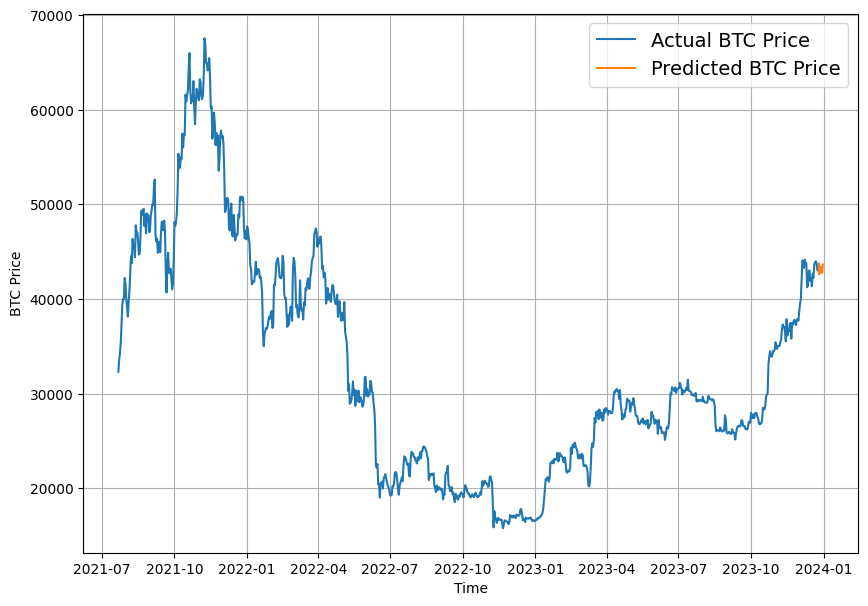

In [228]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_price.index, bitcoin_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [229]:
model_results = pd.DataFrame({"naive": naive_results,
                              "dense_results": dense_results,
                              "dense_2_results": dense_2_results,
                              "dense_3_results": dense_3_results,
                              "model_4_results": model_4_results,
                              "model_5_results": model_5_results,
                              "model_6_results": model_6_results,
                              "model_7_results": model_7_results,
                              "model_8_NBEATs": model_8_results,
                              "model_9_ensemble": ensemble_results
                              }).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive,525.023010,6.747550e+05,821.434692,1.886807,52.828465
dense_results,523.864380,6.648287e+05,815.370239,1.891878,52.789398
dense_2_results,580.314087,7.554922e+05,869.190552,2.110167,53.043438
dense_3_results,1111.883545,2.913884e+06,1285.012329,4.092249,52.739143
model_4_results,538.075562,6.882854e+05,829.629639,1.939787,52.789398
model_5_results,553.716064,7.205715e+05,848.864868,1.998213,52.789398
model_6_results,528.868469,6.719743e+05,819.740356,1.908276,52.789398
model_7_results,523.911499,6.627269e+05,814.080444,1.894885,52.789398
model_8_NBEATs,1461.645142,4.866275e+06,2205.963379,5.345296,52.789398
model_9_ensemble,521.401733,6.587716e+05,811.647461,1.879368,52.789398


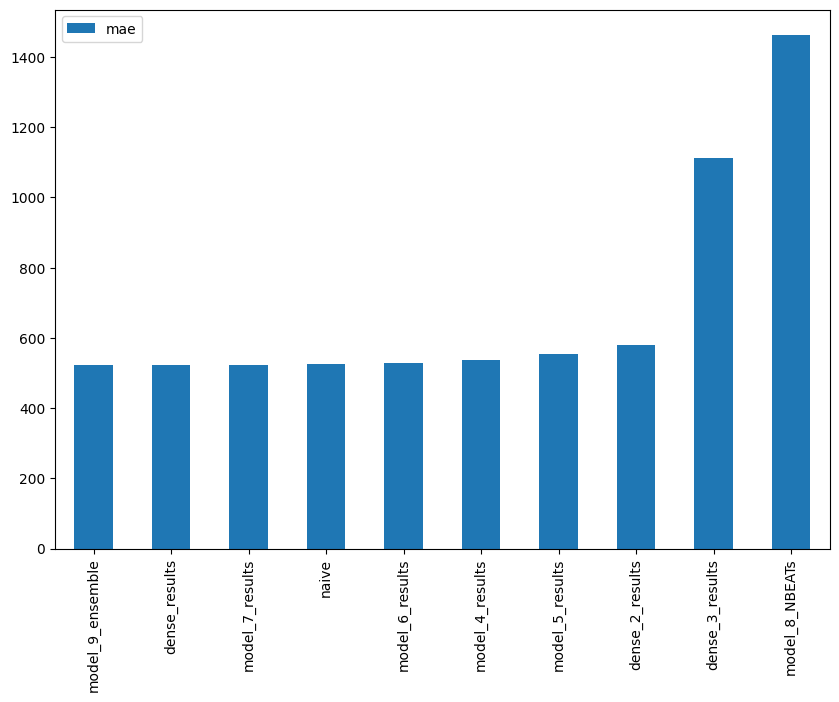

In [230]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");